Optimization terminated successfully.
         Current function value: 0.413265
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1465
Method:                           MLE   Df Model:                            4
Date:                Thu, 17 Oct 2024   Pseudo R-squ.:                 0.06437
Time:                        21:43:14   Log-Likelihood:                -607.50
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 3.028e-17
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5163      0.363      1.421      0.155      -0.196       1.228
Age        

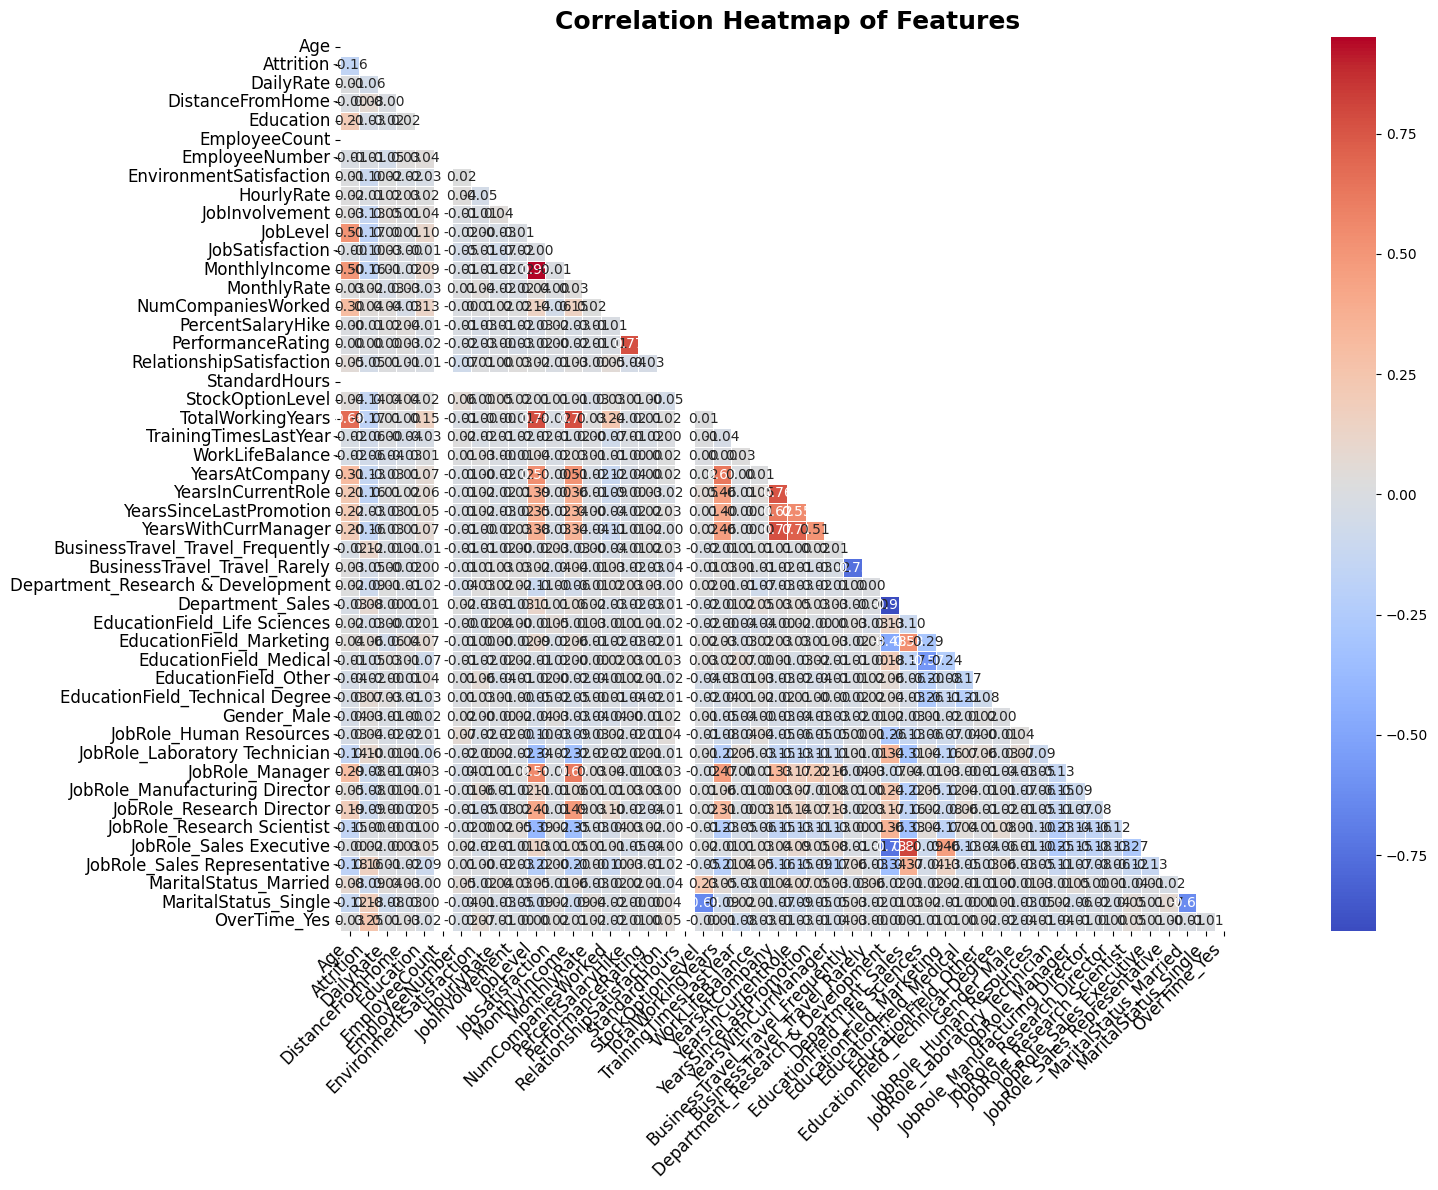

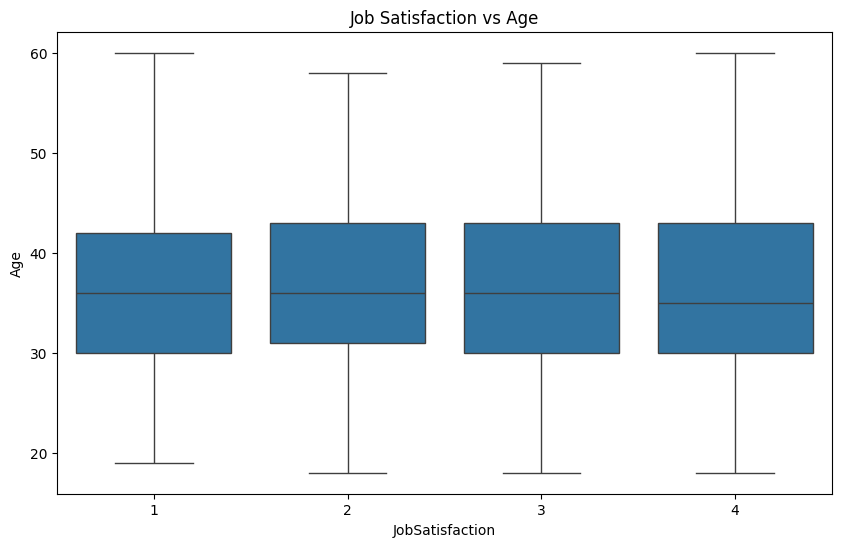

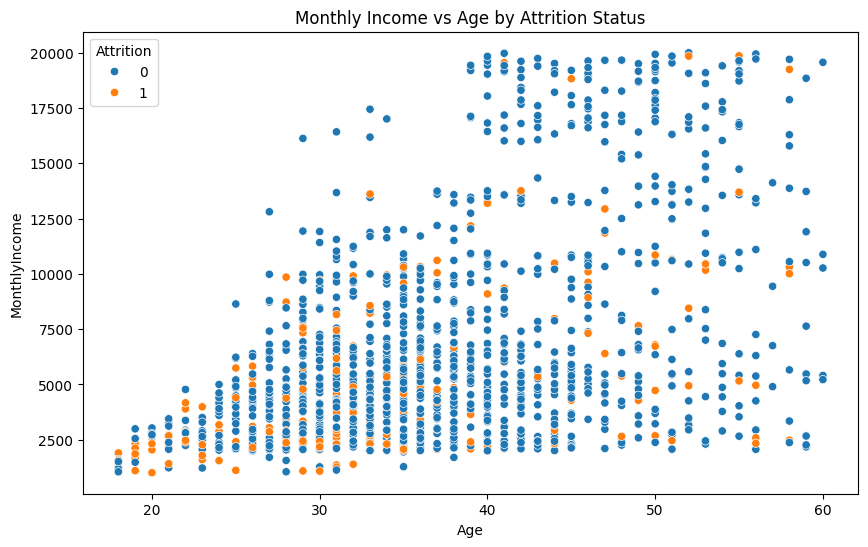

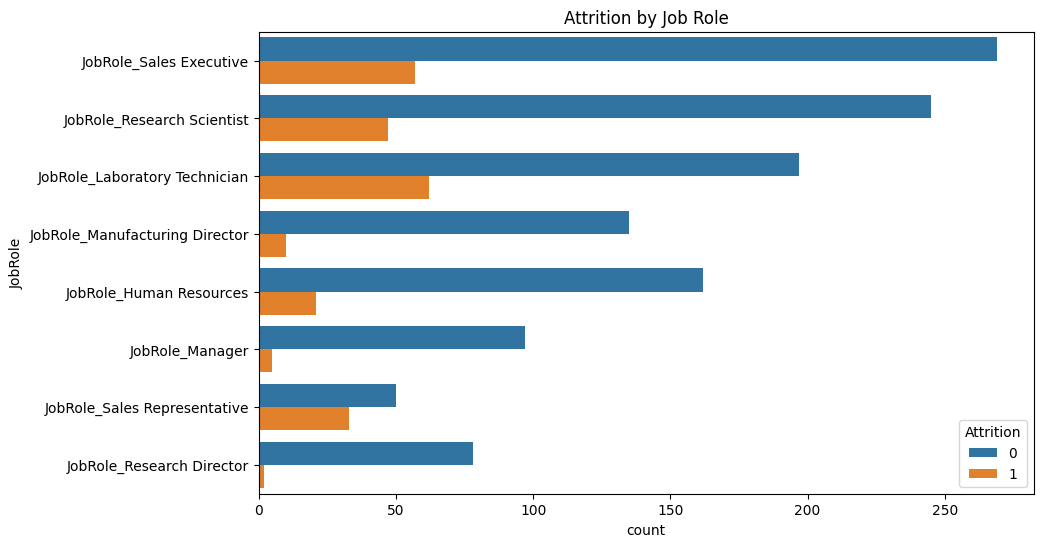

In [1]:
##/content/HR_Analytics.csv
# EMPLOYEE PERFORMANCE ANALYSIS PROJECT

# Import the Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Load and Preprocess the Dataset
data = pd.read_csv('/content/HR_Analytics.csv')

# Data Preprocessing
# Convert 'Attrition' to binary (1 for Yes, 0 for No)
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# Ensure numeric columns are handled correctly
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['MonthlyIncome'] = pd.to_numeric(data['MonthlyIncome'], errors='coerce')

# Convert categorical columns to numeric using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Fill missing values with the column mean
data.fillna(data.mean(), inplace=True)

# Build a Logistic Regression Model to Predict Attrition
X = data[['Age', 'DistanceFromHome', 'MonthlyIncome', 'JobSatisfaction']]
y = data['Attrition']
X = sm.add_constant(X)
model = sm.Logit(y, X).fit()

# Print the Summary of the Logistic Regression Model
print(model.summary())

# Generate a Correlation Heatmap to Visualize Relationships Between Variables
plt.figure(figsize=(20, 12))  # Larger figure size for better readability
mask = np.triu(np.ones_like(data.corr(), dtype=bool))  # Mask the upper triangle for simplicity
sns.heatmap(data.corr(), mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels to avoid overlap
plt.yticks(rotation=0, fontsize=12)  # Keep y-axis labels horizontal
plt.title('Correlation Heatmap of Features', fontsize=18, weight='bold')
plt.tight_layout()  # Adjust layout to fit everything properly
plt.savefig('correlation_heatmap.png')  # Save the heatmap as an image
plt.show()

# Data Visualization - Boxplot: Job Satisfaction vs Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='JobSatisfaction', y='Age', data=data)
plt.title('Job Satisfaction vs Age')
plt.show()

# Data Visualization - Scatter Plot: Monthly Income vs Age by Attrition Status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='MonthlyIncome', hue='Attrition', data=data)
plt.title('Monthly Income vs Age by Attrition Status')
plt.show()

# Combine One-Hot Encoded Job Roles into a Single Column for Easier Analysis
job_role_columns = [
    'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager',
    'JobRole_Manufacturing Director', 'JobRole_Research Director',
    'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative'
]
data['JobRole'] = data[job_role_columns].idxmax(axis=1)

# Data Visualization - Countplot: Attrition by Job Role
plt.figure(figsize=(10, 6))
sns.countplot(y='JobRole', hue='Attrition', data=data)
plt.title('Attrition by Job Role')
plt.show()
